In [1]:
import sys 
sys.path.append('..')
import networkx as nx 
import quarantines as Q 
import EoNlocal as EoN 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns
import utils
sns.set()

In [4]:
def get_propseries(G, tau, gamma, init_num, qrange, num_iter=3):
    N = len(G)
    output_trips = [] 
    for qprop in qrange:
        print(qprop)
        tups = Q.quarantine_by_prop(G, tau, gamma, init_num / N, [qprop], float('inf'), num_iter, return_summary=False)
        output_trips.append((qprop, tups.get_max_I() / N, tups.get_final_R() / N))
    return output_trips

def plot_tripseries(tripseries):
    fig, ax = plt.subplots(figsize=(8,8))
    i_series = [list(utils.selector(_, [0,1])) for _ in tripseries]
    r_series = [list(utils.selector(_, [0,2])) for _ in tripseries]
    
    ax.plot(*zip(*i_series), c='r', label='Max #Infected')
    ax.plot(*zip(*r_series), c='b', label='Final #Recovered')
    ax.legend()

In [11]:
N = 5 * 10 ** 3
G = nx.barabasi_albert_graph(N, 5)
trips = get_propseries(G, 0.1, 0.1, 10 / N, [0.02 * _ for _ in range(1, 40)], 5)

0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2
0.22
0.24
0.26
0.28
0.3
0.32
0.34
0.36
0.38
0.4
0.42
0.44
0.46
0.48
0.5
0.52
0.54
0.56
0.58
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.72
0.74
0.76
0.78


In [21]:
output_pairs = [] 
for q in range(1, 40):
    qprop = q / 50
    print(q, 40)
    output_pairs.append((qprop, Q.quarantine_by_prop(G, 0.1, 0.1, 10 / N, [qprop],float('inf'), num_iter=3).get_final_R()))


1 40
2 40
3 40
4 40
5 40
6 40
7 40
8 40
9 40
10 40
11 40
12 40
13 40
14 40
15 40
16 40
17 40
18 40
19 40
20 40
21 40
22 40
23 40
24 40
25 40
26 40
27 40
28 40
29 40
30 40
31 40
32 40
33 40
34 40
35 40
36 40
37 40
38 40
39 40


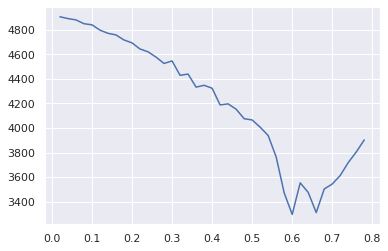

In [22]:
plt.plot(*zip(*output_pairs))